# mnist

MNIST数据集(Mixed National Institute of Standards and Technology database)是美国国家标准与技术研究院收集整理的大型手写数字数据库,包含60,000个示例的训练集以及10,000个示例的测试集.

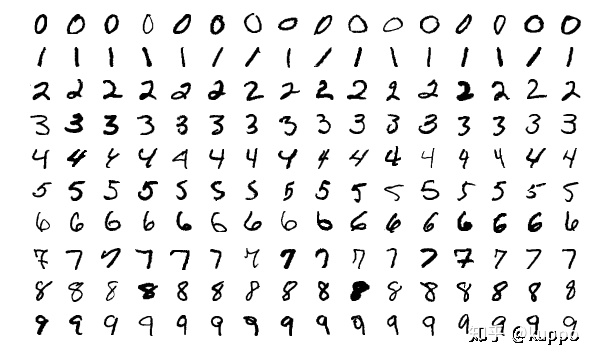

<img src='../static/img/logo.jpg' align='right' style="width:260px;height:60px;display:block"/>

In [2]:
#coding : utf8
 
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data #读数据集
import warnings
warnings.filterwarnings("ignore")
import os


'''
1.数据
读取数据,划分训练集测试集labels,features
'''

data = input_data.read_data_sets('./MNIST_data', one_hot= True) #读取数据
print('train:',data.train.images.shape)
print('test:',data.test.images.shape)

Extracting ./MNIST_data\train-images-idx3-ubyte.gz
Extracting ./MNIST_data\train-labels-idx1-ubyte.gz
Extracting ./MNIST_data\t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data\t10k-labels-idx1-ubyte.gz
train: (55000, 784)
test: (10000, 784)


In [5]:
# 选取部分数据训练与测试
train_x, train_y = data.train.images[:5000], data.train.labels[:5000]
test_x, test_y = data.test.images[:1000], data.test.labels[:1000]
train_x.shape
# # 全部数据
# train_x, train_y = data.train.images, data.train.labels
# test_x, test_y = data.test.images, data.test.labels
# train_x.shape

(5000, 784)

In [20]:
 
'''
2.参数
本文使用两层隐藏层,各层neuron个数分别为:
input_layer: 28*28 (features of train_x or test_x)
hidden_layer1: 256
hidden_layer2: 128
output_layer: 10
'''
n_input = 28 * 28
n_hidden_layer_1 = 256
n_hidden_layer_2 = 128
n_output_layer = 10
 
x = tf.placeholder(tf.float32, [None, n_input])
y = tf.placeholder(tf.float32, [None, n_output_layer])
 
# 生成指定shape的随机张量
w = {
    'w1': tf.Variable(tf.random_normal([n_input, n_hidden_layer_1],seed=10001),dtype= tf.float32),
    'w2': tf.Variable(tf.random_normal([n_hidden_layer_1, n_hidden_layer_2],seed=10001),dtype= tf.float32),
    'w_out': tf.Variable(tf.random_normal([n_hidden_layer_2, n_output_layer],seed=10001),dtype= tf.float32)
}
# 生成全零的偏置张量
b = {
    'b1': tf.Variable(tf.zeros([1,n_hidden_layer_1]), dtype= tf.float32),
    'b2': tf.Variable(tf.zeros([1,n_hidden_layer_2]), dtype= tf.float32),
    'b_out': tf.Variable(tf.zeros([1,n_output_layer]), dtype= tf.float32)
}


In [21]:
 
'''
3.前向传播
'''
 
def forward_propagation(_x, _w, _b):
    layer1 = tf.nn.relu(tf.add(tf.matmul(_x, _w['w1']), _b['b1']))
    layer2 = tf.nn.relu(tf.add(tf.matmul(layer1, _w['w2']), _b['b2']))
    return tf.add(tf.matmul(layer2, _w['w_out']), _b['b_out'])
 

In [22]:

'''
4.损失函数
'''

learn_rate = 0.001
y_predict = forward_propagation(x, w, b)
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits= y_predict, labels= y))
optm = tf.train.GradientDescentOptimizer(learn_rate).minimize(loss)


Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [23]:
 
'''
5.评价
'''
result = tf.equal(tf.math.argmax(y_predict, 1), tf.math.argmax(y, 1))
# tf.cast改变张量类型
acc = tf.reduce_mean(tf.cast(result, dtype=tf.float32))


In [27]:

'''
6.训练和保存
'''
epochs = 50
batch_size = 128
init = tf.global_variables_initializer()

save_path = './000/'
if not save_path:
    os.makedir(save_path)
saver = tf.train.Saver(max_to_keep=3)
with tf.Session() as sess:
    sess.run(init)
    for i in range(epochs):
        cost = count = 0.0
        for batch_index in range(0, train_y.shape[0], batch_size):
            count += 1
            feed = {x: train_x[batch_index: batch_index + batch_size], y: train_y[batch_index: batch_index + batch_size]}
            sess.run(optm, feed_dict= feed)
            cost += sess.run(loss, feed_dict= feed)
        cost /= count
        # 测试集精度
        feed_test = {x: test_x, y: test_y}
        accuracy = sess.run(acc, feed_dict= feed_test)
        # 保存模型
        # saver.save(sess, os.path.join(save_path,global_step = i+1))
        saver.save(sess, save_path, global_step = i+1)
        if i%1 == 0 or i==epochs:
            print('epoch:{:>3d}, 损失值:{:>6.3f}, 分类准确率:{:.3f}'.format(i+1, cost, accuracy))

epoch:  1, 损失值:436.051, 分类准确率:0.308
epoch:  2, 损失值:184.253, 分类准确率:0.447
epoch:  3, 损失值:120.799, 分类准确率:0.523
epoch:  4, 损失值:93.766, 分类准确率:0.581
epoch:  5, 损失值:78.687, 分类准确率:0.605
epoch:  6, 损失值:68.820, 分类准确率:0.624
epoch:  7, 损失值:61.666, 分类准确率:0.638
epoch:  8, 损失值:55.892, 分类准确率:0.654
epoch:  9, 损失值:51.352, 分类准确率:0.667
epoch: 10, 损失值:47.514, 分类准确率:0.673
epoch: 11, 损失值:44.357, 分类准确率:0.691
epoch: 12, 损失值:41.602, 分类准确率:0.694
epoch: 13, 损失值:39.138, 分类准确率:0.700
epoch: 14, 损失值:37.010, 分类准确率:0.706
epoch: 15, 损失值:35.036, 分类准确率:0.713
epoch: 16, 损失值:33.292, 分类准确率:0.719
epoch: 17, 损失值:31.686, 分类准确率:0.724
epoch: 18, 损失值:30.233, 分类准确率:0.727
epoch: 19, 损失值:28.918, 分类准确率:0.733
epoch: 20, 损失值:27.685, 分类准确率:0.734
epoch: 21, 损失值:26.551, 分类准确率:0.736
epoch: 22, 损失值:25.520, 分类准确率:0.738
epoch: 23, 损失值:24.520, 分类准确率:0.738
epoch: 24, 损失值:23.599, 分类准确率:0.739
epoch: 25, 损失值:22.771, 分类准确率:0.739
epoch: 26, 损失值:21.952, 分类准确率:0.742
epoch: 27, 损失值:21.216, 分类准确率:0.741
epoch: 28, 损失值:20.512, 分类准确率:0.744
epoch: 29, 损失值:19